## ОТЧЕТ ПО КОНТРОЛЬНОЙ РАБОТЕ № 8


### Дисциплина: Методы машинного обучения

##### Студент:  Фаик Карим
##### Группа:   НФИбд-02-21

### Вариант 22



#1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую, валидационную и тестовую выборки. Если при дальнейшей работе с данными возникнет нехватка вычислительных ресурсов, то разрешение изображений можно уменьшить.

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from PIL import Image, ImageOps

ds = tfds.load("dtd", split=['train[:50%]','test[:50%]'])

df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])
df_train.shape, df_test.shape

((940, 3), (940, 3))

In [2]:
df_train['label'].unique(), df_test['label'].unique()

(array([13,  2, 12,  8, 30, 45,  1, 23, 25, 44,  4, 15, 18, 14, 42,  9, 27,
        36, 41, 29, 20, 46, 33, 16, 10, 32, 34, 43, 31, 38, 28,  5, 17, 19,
         0,  7, 22,  3,  6, 21, 26, 11, 37, 24, 40, 39, 35]),
 array([22,  7, 26, 19, 13, 45,  3, 39, 35, 14, 33,  0,  1, 11, 42, 24, 20,
         4, 12, 29, 16, 32,  6,  8, 21, 31, 44, 17, 40, 23, 34, 41, 28, 36,
        27,  5, 38, 15, 25, 18,  2, 10,  9, 43, 46, 37, 30]))

In [3]:
df_train = tfds.as_dataframe(ds[0])
df_test  = tfds.as_dataframe(ds[1])
df_train.shape, df_test.shape

((940, 3), (940, 3))

In [4]:
train_labels = df_train['label'].to_numpy(dtype=np.float32)
test_labels = df_test['label'].to_numpy(dtype=np.float32)
train_labels.shape, test_labels.shape

((940,), (940,))

In [5]:
train_images = np.zeros(shape=(df_train.shape[0], 84, 84, 3), dtype=np.float32)
test_images  = np.zeros(shape=(df_test.shape[0], 84, 84, 3), dtype=np.float32)
train_images.shape, test_images.shape

((940, 84, 84, 3), (940, 84, 84, 3))

In [6]:
for idx in range(train_labels.shape[0]):

    train_images[idx,:,:,:] = \
        np.array(tf.image.resize(Image.fromarray(df_train.iloc[idx]['image']), [84, 84]))


for idx in range(test_labels.shape[0]):
    test_images[idx,:,:,:] = \
        np.array(tf.image.resize(Image.fromarray(df_test.iloc[idx]['image']), [84, 84]))

train_images.shape, test_images.shape

((940, 84, 84, 3), (940, 84, 84, 3))

In [7]:
train_images = train_images[0:]
test_images = test_images[0:]

In [8]:
train_images /= 255
test_images  /= 255

train_images.shape, test_images.shape

((940, 84, 84, 3), (940, 84, 84, 3))

#2. Оставьте в наборе изображения, указанных в индивидуальном задании, и визуализируйте по одному изображению из каждого класса, подписывая изображение меткой класса.

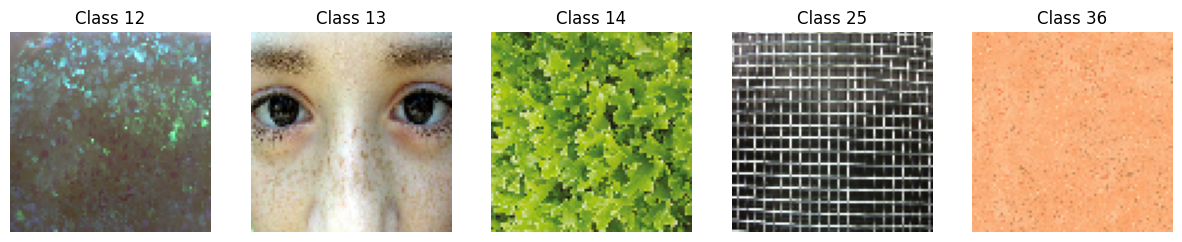

In [9]:
# Фильтрация классов
desired_labels = [12, 13, 14, 25, 36]

train_filtered_indices = [idx for idx, label in enumerate(train_labels) if label in desired_labels]
test_filtered_indices = [idx for idx, label in enumerate(test_labels) if label in desired_labels]

train_filtered_images = train_images[train_filtered_indices]
train_filtered_labels = train_labels[train_filtered_indices]
test_filtered_images = test_images[test_filtered_indices]
test_filtered_labels = test_labels[test_filtered_indices]

# Визуализация по одному изображению из каждого класса
fig, axes = plt.subplots(1, len(desired_labels), figsize=(15, 5))
for idx, label in enumerate(desired_labels):
    image_idx = np.where(train_filtered_labels == label)[0][0]
    axes[idx].imshow(train_filtered_images[image_idx])
    axes[idx].set_title(f"Class {int(label)}")
    axes[idx].axis('off')

plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Разделение данных на обучающую и валидационную выборки
train_images, val_images, train_labels, val_labels = train_test_split(
    train_filtered_images, train_filtered_labels, test_size=0.2, random_state=42
)

#3. Постройте нейронные сети различных архитектур (MLP, CNN, RNN, трансформер) для задачи многоклассовой классификации изображений (архитектуры и требования к сетям указаны в индивидуальном задании), используя функции потерь, указанные в индивидуальном задании. Подберите такие параметры, как функции активации, оптимизатор, начальная скорость обучения, размер мини-пакета и др. самостоятельно, обеспечивая обучение нейронных сетей. Обучайте нейронные сети с использованием валидационной выборки, сформированной в п. 1. Останавливайте переобучение нейронных сетей в случае роста потерь на валидационной выборке на нескольких эпохах обучения подряд.

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models


In [12]:
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
val_labels_encoded = label_encoder.transform(val_labels)
inverse_label_map = {idx: label for idx, label in enumerate(label_encoder.classes_)}


mlp_model = models.Sequential([
    layers.Flatten(input_shape=(84, 84, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(desired_labels), activation='softmax')
])

mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

mlp_history = mlp_model.fit(train_images, train_labels_encoded, epochs=30, validation_data=(val_images, val_labels_encoded), batch_size=64)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 545ms/step - accuracy: 0.2076 - loss: 2.5530 - val_accuracy: 0.1905 - val_loss: 13.1331
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - accuracy: 0.1725 - loss: 11.4393 - val_accuracy: 0.2857 - val_loss: 9.4244
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.2159 - loss: 7.5086 - val_accuracy: 0.1905 - val_loss: 3.5051
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.1725 - loss: 3.1505 - val_accuracy: 0.1429 - val_loss: 2.0744
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.3398 - loss: 1.8282 - val_accuracy: 0.1429 - val_loss: 2.6730
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.2696 - loss: 2.3986 - val_accuracy: 0.1905 - val_loss: 2.2198
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.3637 - loss: 1.8454 - val_accuracy: 0.1905 - val_loss: 2.3150
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.3360 - loss: 1.9329 - val_accuracy: 0.1905 - val_los

In [13]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1
import numpy as np
from tensorflow.keras.utils import to_categorical

In [14]:


train_labels_encoded_one_hot = to_categorical(train_labels_encoded)

val_labels_encoded_one_hot = to_categorical(val_labels_encoded)


In [15]:


train_labels_encoded_one_hot = to_categorical(train_labels_encoded)
val_labels_encoded_one_hot = to_categorical(val_labels_encoded)

cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(84, 84, 3), kernel_regularizer=l1(0.01)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l1(0.01)))
cnn_model.add(layers.MaxPooling2D((2, 2)))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dense(np.unique(train_labels_encoded).shape[0], activation='softmax'))

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(train_images, train_labels_encoded_one_hot, epochs=10, validation_data=(val_images, val_labels_encoded_one_hot), batch_size=64)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 373ms/step - accuracy: 0.2128 - loss: 3.7836 - val_accuracy: 0.2381 - val_loss: 3.8074
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - accuracy: 0.3234 - loss: 3.6771 - val_accuracy: 0.2857 - val_loss: 3.5293
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.2704 - loss: 3.5756 - val_accuracy: 0.3333 - val_loss: 3.3715
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.3823 - loss: 3.4300 - val_accuracy: 0.3810 - val_loss: 3.3490
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.5548 - loss: 3.3263 - val_accuracy: 0.3810 - val_loss: 3.3315
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.5982 - loss: 3.2430 - val_accuracy: 0.3333 - val_loss: 3.3001
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.4525 - loss: 3.2111 - val_accuracy: 0.3810 - val_loss: 3.2361
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.4877 - loss: 3.1025 - val_accuracy: 0.3810 - val_loss: 3.2032
Epo

In [16]:
# RNN
rnn_model = models.Sequential([
    layers.Reshape((84*84, 3), input_shape=(84, 84, 3)),
    layers.LSTM(96),
    layers.BatchNormalization(),
    layers.Dense(len(desired_labels), activation='softmax')
])

rnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

rnn_history = rnn_model.fit(train_images, train_labels_encoded, epochs=30, validation_data=(val_images, val_labels_encoded), batch_size=128)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.2593 - loss: 1.7670 - val_accuracy: 0.1429 - val_loss: 1.6158
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.2593 - loss: 1.6407 - val_accuracy: 0.1429 - val_loss: 1.6104
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.3333 - loss: 1.5855 - val_accuracy: 0.2857 - val_loss: 1.6074
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3333 - loss: 1.5748 - val_accuracy: 0.2381 - val_loss: 1.6060
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3704 - loss: 1.5695 - val_accuracy: 0.2381 - val_loss: 1.6054
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3457 - loss: 1.5559 - val_accuracy: 0.2381 - val_loss: 1.6051
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.3086 - loss: 1.5393 - val_accuracy: 0.2381 - val_loss: 1.6048
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.3210 - loss: 1.5252 - val_accuracy: 0.2381 - val_loss: 1.6048
Epoch 9/30
1/1 ━━━━

In [17]:
from keras import layers, models, losses, callbacks
from keras import ops

In [18]:
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 30
image_size = 84
patch_size = 6
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  #
transformer_layers = 8
mlp_head_units = [
    2048,
    1024,
]

num_classes = 4
input_shape = (84, 84, 3)

In [19]:
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        input_shape = ops.shape(images)
        batch_size = input_shape[0]
        height = input_shape[1]
        width = input_shape[2]
        channels = input_shape[3]
        num_patches_h = height // self.patch_size
        num_patches_w = width // self.patch_size
        patches = keras.ops.image.extract_patches(images, size=self.patch_size)
        patches = ops.reshape(
            patches,
            (
                batch_size,
                num_patches_h * num_patches_w,
                self.patch_size * self.patch_size * channels,
            ),
        )
        return patches

    def get_config(self):
        config = super().get_config()
        config.update({"patch_size": self.patch_size})
        return config


In [20]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = ops.expand_dims(
            ops.arange(start=0, stop=self.num_patches, step=1), axis=0
        )
        projected_patches = self.projection(patch)
        encoded = projected_patches + self.position_embedding(positions)
        return encoded

    def get_config(self):
        config = super().get_config()
        config.update({"num_patches": self.num_patches})
        return config


In [21]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=keras.activations.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [25]:
import tensorflow as tf
from tensorflow.keras import layers, losses, callbacks
from tensorflow import keras

learning_rate = 0.001
weight_decay = 0.0001
batch_size = 256
num_epochs = 30
image_size = 84
patch_size = 6
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 4
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  #
transformer_layers = 8
mlp_head_units = [
    2048,
    1024,
]

num_classes = 5
input_shape = (84, 84, 3)

data_augmentation = keras.Sequential(
    [
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(height_factor=0.2, width_factor=0.2),
        layers.Rescaling(1./255),
    ],
    name="data_augmentation",
)

def create_vit_classifier():
    inputs = keras.Input(shape=input_shape)
    augmented = data_augmentation(inputs)
    patches = Patches(patch_size)(augmented)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)
    for _ in range(transformer_layers):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        encoded_patches = layers.Add()([x3, x2])

    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    logits = layers.Dense(num_classes)(features)

    model = keras.Model(inputs=inputs, outputs=logits)
    return model

ViT = create_vit_classifier()

optimizer = keras.optimizers.AdamW(
    learning_rate=learning_rate, weight_decay=weight_decay
)

ViT.compile(
    optimizer=optimizer,
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
        keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
    ],
)

checkpoint_filepath = "ViT_checkpoint.weights.h5"
checkpoint_callback = keras.callbacks.ModelCheckpoint(
    checkpoint_filepath,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True,
)

early_stopping_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

history = ViT.fit(
    x=train_images,
    y=train_labels_encoded,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_split=0.1,
    validation_data=(val_images, val_labels_encoded),
    callbacks=[checkpoint_callback, early_stopping_callback],
)



Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 62s 62s/step - accuracy: 0.1852 - loss: 4.1640 - top-5-accuracy: 1.0000 - val_accuracy: 0.2857 - val_loss: 7.7137 - val_top-5-accuracy: 1.0000
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.1852 - loss: 10.3060 - top-5-accuracy: 1.0000 - val_accuracy: 0.0952 - val_loss: 13.2709 - val_top-5-accuracy: 1.0000
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.1852 - loss: 12.3019 - top-5-accuracy: 1.0000 - val_accuracy: 0.2381 - val_loss: 12.1042 - val_top-5-accuracy: 1.0000
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.1852 - loss: 19.4458 - top-5-accuracy: 1.0000 - val_accuracy: 0.2857 - val_loss: 11.1849 - val_top-5-accuracy: 1.0000


обучение было приостановлено на 4-ой эпохе

#4. Вычислите и выведите в отчете матрицы ошибок нейронных сетей для обучающей и тестовой выборок.

In [26]:
mlp_train_predictions = np.argmax(mlp_model.predict(train_images), axis=1)
mlp_test_predictions = np.argmax(mlp_model.predict(test_images), axis=1)

mlp_train_confusion_matrix = tf.math.confusion_matrix(train_labels, mlp_train_predictions)
mlp_test_confusion_matrix = tf.math.confusion_matrix(test_labels, mlp_test_predictions)

print("Confusion Matrix for MLP (Training Data):\n", mlp_train_confusion_matrix)
print("\nConfusion Matrix for MLP (Testing Data):\n", mlp_test_confusion_matrix)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Confusion Matrix for MLP (Training Data):
 tf.Tensor(
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], shape=(37, 37), dtype=int32)

Confusion Matrix for MLP (Testing Data):
 tf.Tensor(
[[4 1 3 ... 0 0 0]
 [7 1 3 ... 0 0 0]
 [8 1 4 ... 0 0 0]
 ...
 [4 4 7 ... 0 0 0]
 [4 4 5 ... 0 0 0]
 [4 2 4 ... 0 0 0]], shape=(47, 47), dtype=int32)


In [27]:
# Предсказания модели CNN на обучающей выборке
cnn_train_predictions = np.argmax(cnn_model.predict(train_images), axis=1)
# Предсказания модели CNN на тестовой выборке
cnn_test_predictions = np.argmax(cnn_model.predict(test_images), axis=1)

# Вычисление матрицы ошибок для CNN на обучающей и тестовой выборках
cnn_train_confusion_matrix = tf.math.confusion_matrix(train_labels, cnn_train_predictions)
cnn_test_confusion_matrix = tf.math.confusion_matrix(test_labels, cnn_test_predictions)

print("Confusion Matrix for CNN (Training Data):\n", cnn_train_confusion_matrix)
print("\nConfusion Matrix for CNN (Testing Data):\n", cnn_test_confusion_matrix)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step
Confusion Matrix for CNN (Training Data):
 tf.Tensor(
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 2 0 ... 0 0 0]], shape=(37, 37), dtype=int32)

Confusion Matrix for CNN (Testing Data):
 tf.Tensor(
[[7 2 1 ... 0 0 0]
 [9 2 3 ... 0 0 0]
 [6 2 0 ... 0 0 0]
 ...
 [1 2 2 ... 0 0 0]
 [8 4 1 ... 0 0 0]
 [3 1 0 ... 0 0 0]], shape=(47, 47), dtype=int32)


In [28]:
# Предсказания модели RNN на обучающей выборке
rnn_train_predictions = np.argmax(rnn_model.predict(train_images), axis=1)
# Предсказания модели RNN на тестовой выборке
rnn_test_predictions = np.argmax(rnn_model.predict(test_images), axis=1)

# Вычисление матрицы ошибок для RNN на обучающей и тестовой выборках
rnn_train_confusion_matrix = tf.math.confusion_matrix(train_labels, rnn_train_predictions)
rnn_test_confusion_matrix = tf.math.confusion_matrix(test_labels, rnn_test_predictions)

print("Confusion Matrix for RNN (Training Data):\n", rnn_train_confusion_matrix)
print("\nConfusion Matrix for RNN (Testing Data):\n", rnn_test_confusion_matrix)


3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step
Confusion Matrix for RNN (Training Data):
 tf.Tensor(
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0 14 ...  0  0  0]], shape=(37, 37), dtype=int32)

Confusion Matrix for RNN (Testing Data):
 tf.Tensor(
[[ 0  0 17 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 [ 0  0 20 ...  0  0  0]
 ...
 [ 0  0 25 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 [ 0  0 15 ...  0  0  0]], shape=(47, 47), dtype=int32)


In [29]:
# Предсказания модели Transformer на обучающей выборке
transformer_train_predictions = np.argmax(ViT.predict(train_images), axis=1)
# Предсказания модели Transformer на тестовой выборке
transformer_test_predictions = np.argmax(ViT.predict(test_images), axis=1)

# Вычисление матрицы ошибок для Transformer на обучающей и тестовой выборках
transformer_train_confusion_matrix = tf.math.confusion_matrix(train_labels, transformer_train_predictions)
transformer_test_confusion_matrix = tf.math.confusion_matrix(test_labels, transformer_test_predictions)

print("Confusion Matrix for Transformer (Training Data):\n", transformer_train_confusion_matrix)
print("\nConfusion Matrix for Transformer (Testing Data):\n", transformer_test_confusion_matrix)


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
30/30 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step
Confusion Matrix for Transformer (Training Data):
 tf.Tensor(
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], shape=(37, 37), dtype=int32)

Confusion Matrix for Transformer (Testing Data):
 tf.Tensor(
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], shape=(47, 47), dtype=int32)


#5. Визуализируйте кривые обучения построенных моделей для показателей потерь на обучающей и валидационной выборках на одном рисунке в зависимости от эпохи обучения, подписывая оси и рисунок и создавая легенду. Используйте для визуализации относительные потери (потери, деленные на начальные потери на первой эпохе).

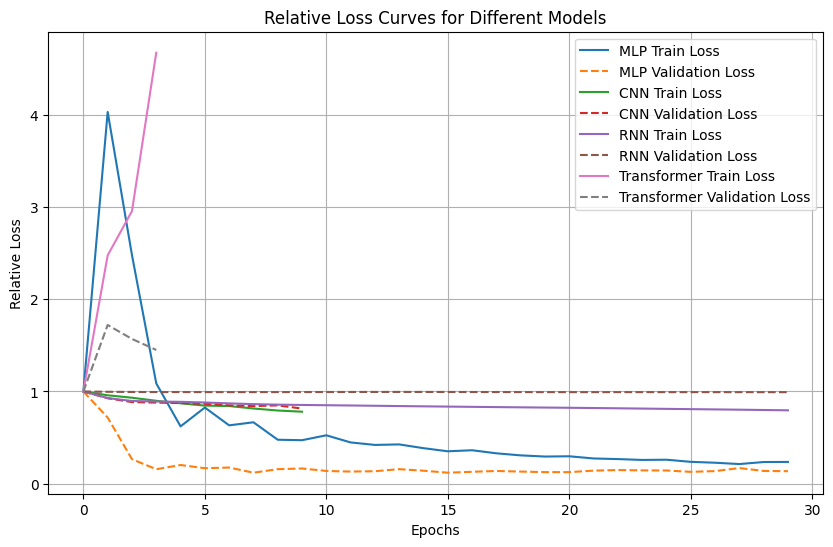

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# Преобразование списков потерь в массивы numpy
mlp_train_loss = np.array(mlp_history.history['loss'])
mlp_val_loss = np.array(mlp_history.history['val_loss'])

cnn_train_loss = np.array(cnn_history.history['loss'])
cnn_val_loss = np.array(cnn_history.history['val_loss'])

rnn_train_loss = np.array(rnn_history.history['loss'])
rnn_val_loss = np.array(rnn_history.history['val_loss'])

transformer_train_loss = np.array(history.history['loss'])
transformer_val_loss = np.array(history.history['val_loss'])

# Вычисление относительных потерь (потери, деленные на начальные потери на первой эпохе)
mlp_relative_train_loss = mlp_train_loss / mlp_train_loss[0]
mlp_relative_val_loss = mlp_val_loss / mlp_val_loss[0]

cnn_relative_train_loss = cnn_train_loss / cnn_train_loss[0]
cnn_relative_val_loss = cnn_val_loss / cnn_val_loss[0]

rnn_relative_train_loss = rnn_train_loss / rnn_train_loss[0]
rnn_relative_val_loss = rnn_val_loss / rnn_val_loss[0]

transformer_relative_train_loss = transformer_train_loss / transformer_train_loss[0]
transformer_relative_val_loss = transformer_val_loss / transformer_val_loss[0]

# Построение кривых обучения
plt.figure(figsize=(10, 6))

plt.plot(mlp_relative_train_loss, label='MLP Train Loss', linestyle='-')
plt.plot(mlp_relative_val_loss, label='MLP Validation Loss', linestyle='--')

plt.plot(cnn_relative_train_loss, label='CNN Train Loss', linestyle='-')
plt.plot(cnn_relative_val_loss, label='CNN Validation Loss', linestyle='--')

plt.plot(rnn_relative_train_loss, label='RNN Train Loss', linestyle='-')
plt.plot(rnn_relative_val_loss, label='RNN Validation Loss', linestyle='--')

plt.plot(transformer_relative_train_loss, label='Transformer Train Loss', linestyle='-')
plt.plot(transformer_relative_val_loss, label='Transformer Validation Loss', linestyle='--')

plt.title('Relative Loss Curves for Different Models')
plt.xlabel('Epochs')
plt.ylabel('Relative Loss')
plt.legend()
plt.grid(True)
plt.show()


#6. Оцените качество многоклассовой классификации нейронными сетями на тестовой выборке при помощи показателя качества, указанного в индивидуальном задании, и выведите название нейронной сети с лучшим качеством.

In [31]:
wfrom sklearn.metrics import recall_score

# Вычисление полноты для каждой модели
mlp_recall = recall_score(test_labels, mlp_test_predictions, average=None)
cnn_recall = recall_score(test_labels, cnn_test_predictions, average=None)
rnn_recall = recall_score(test_labels, rnn_test_predictions, average=None)
transformer_recall = recall_score(test_labels, transformer_test_predictions, average=None)

# Нахождение минимальной полноты классов
min_recall = min(mlp_recall.min(), cnn_recall.min(), rnn_recall.min(), transformer_recall.min())

# Вывод названия модели с лучшим показателем качества (минимальной полнотой классов)
if min_recall == mlp_recall.min():
    print("MLP имеет лучший показатель класса.")
elif min_recall == cnn_recall.min():
    print("CNN имеет лучший показатель класса.")
elif min_recall == rnn_recall.min():
    print("RNN имеет лучший показатель класса.")
else:
    print("Transformer имеет лучший показатель класса.")


MLP имеет лучший показатель класса.
